# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [21]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = 'multi_round'
#file = '10000_sims_17_fake_obs_maf_ratio_validate'
#file='multi_round_10000_17params_nsf_fake_1804'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results


In [22]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((10000,), not_within_prior=True)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [23]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [24]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

#list_min = list(torch.nn.functional.relu(list_min - diff))
list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-3.2981e-01, -6.3964e-02, -2.9449e+00, -6.1465e-01, -1.6093e-02,
         1.0036e+01, -8.7011e-05, -6.2076e-02, -1.8945e-02, -5.7167e-02,
        -1.3365e-01,  5.8541e+01, -1.1677e+01, -3.5029e+00, -1.4033e+00,
        -4.7215e-01,  1.1212e+02])
tensor([1.0823e+00, 2.2182e-01, 5.5367e+00, 1.8717e+00, 1.7733e-02, 2.9978e+01,
        1.2605e-04, 9.6695e-02, 5.7458e-02, 2.2899e-01, 2.5827e-01, 6.6846e+01,
        1.8352e+01, 8.9931e+00, 1.6860e+00, 6.1578e-01, 1.3007e+02])
tensor([1.4121e-01, 2.8578e-02, 8.4817e-01, 2.4863e-01, 3.3826e-03, 1.9942e+00,
        2.1306e-05, 1.5877e-02, 7.6403e-03, 2.8616e-02, 3.9192e-02, 8.3051e-01,
        3.0029e+00, 1.2496e+00, 3.0893e-01, 1.0879e-01, 1.7948e+00])


In [25]:
#limits = [list(tup ) for tup in zip(prior_min, prior_max)]
true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

<Figure size 432x288 with 0 Axes>

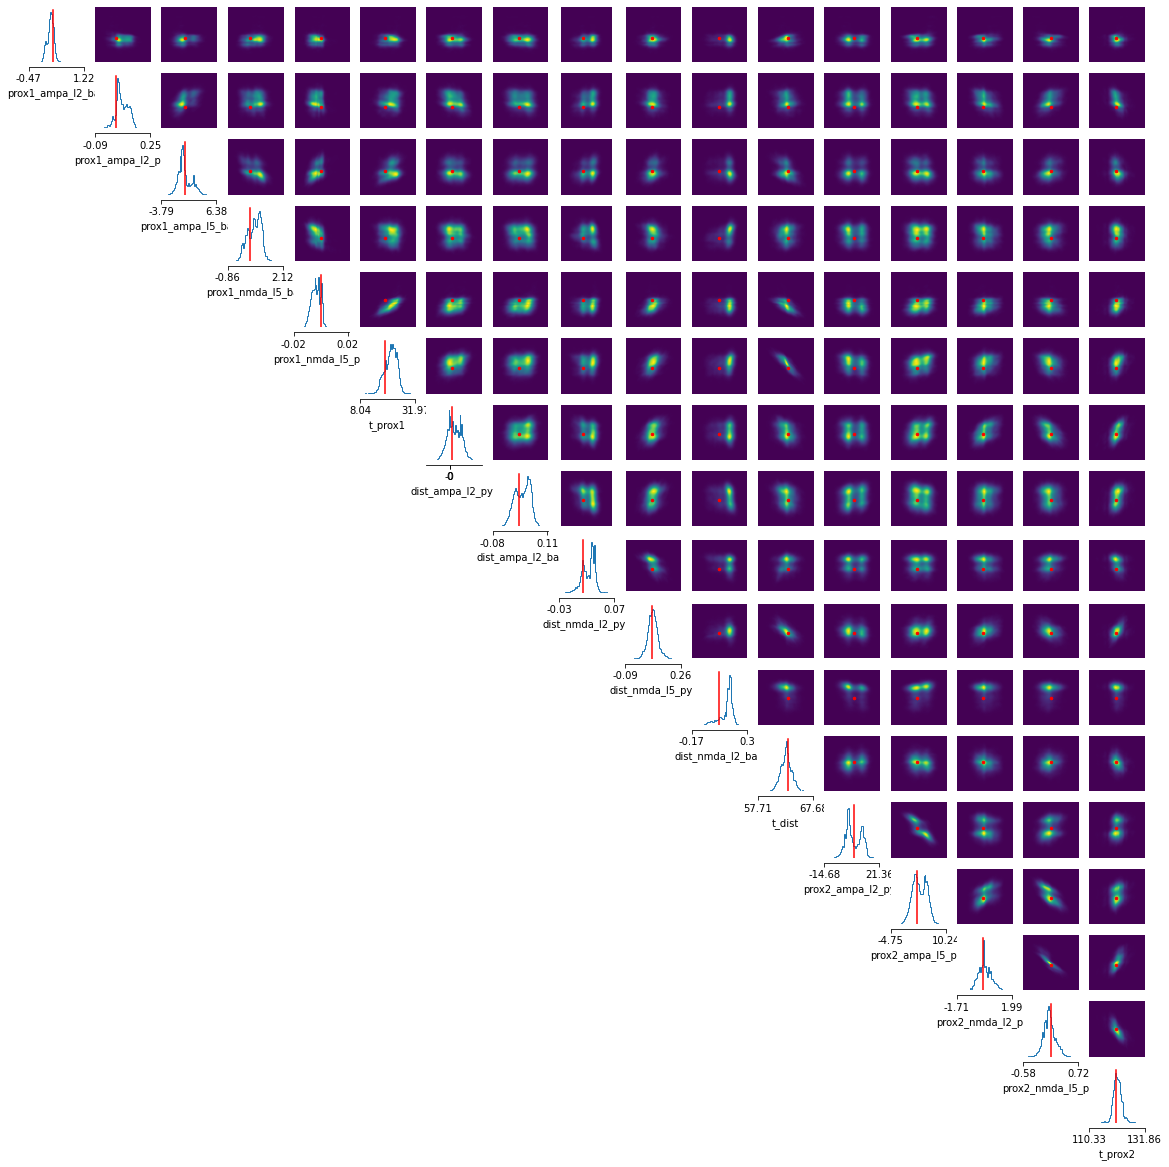

In [26]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')